In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import sklearn

In [3]:
from sklearn.datasets import load_iris
iris = load_iris()

In [4]:
type(iris)


sklearn.utils._bunch.Bunch

In [5]:
data1 = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])

In [ ]:
data1.shape  #There are 5 features ( columns ) and 150 rows, observations


(150, 5)

In [ ]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
data1['target'].value_counts()
### There are basically 3 types of categories 0 means setosa, 1 means versicolor, and 2 means virginica

0.0    50
1.0    50
2.0    50
Name: target, dtype: int64

In [ ]:
def categorize(a):
    if a == 0.0:
        return('setosa')
    if a == 1.0:
        return('versicolor')
    return('virginica')
data1['Species'] = data1['target'].apply(categorize)


In [ ]:
data1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Species
0,5.1,3.5,1.4,0.2,0.0,setosa
1,4.9,3.0,1.4,0.2,0.0,setosa
2,4.7,3.2,1.3,0.2,0.0,setosa
3,4.6,3.1,1.5,0.2,0.0,setosa
4,5.0,3.6,1.4,0.2,0.0,setosa


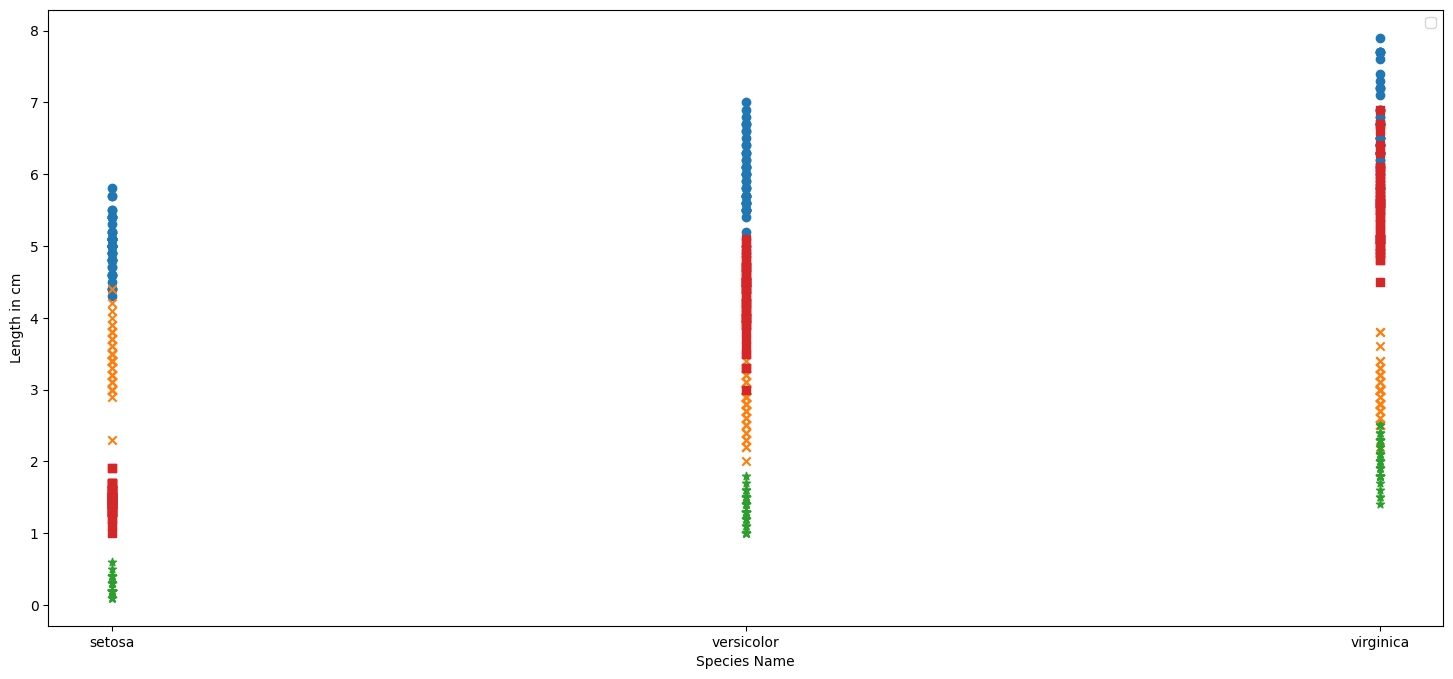

In [ ]:
plt.figure(figsize=[18,8])
plt.scatter(data1['Species'], data1['sepal length (cm)'],  marker= 'o')
plt.scatter(data1['Species'], data1['sepal width (cm)'], marker= 'x')
plt.scatter(data1['Species'], data1['petal width (cm)'], marker= '*')
plt.scatter(data1['Species'], data1['petal length (cm)'], marker= ',')
plt.ylabel('Length in cm')
plt.legend()
plt.xlabel('Species Name')
plt.show()

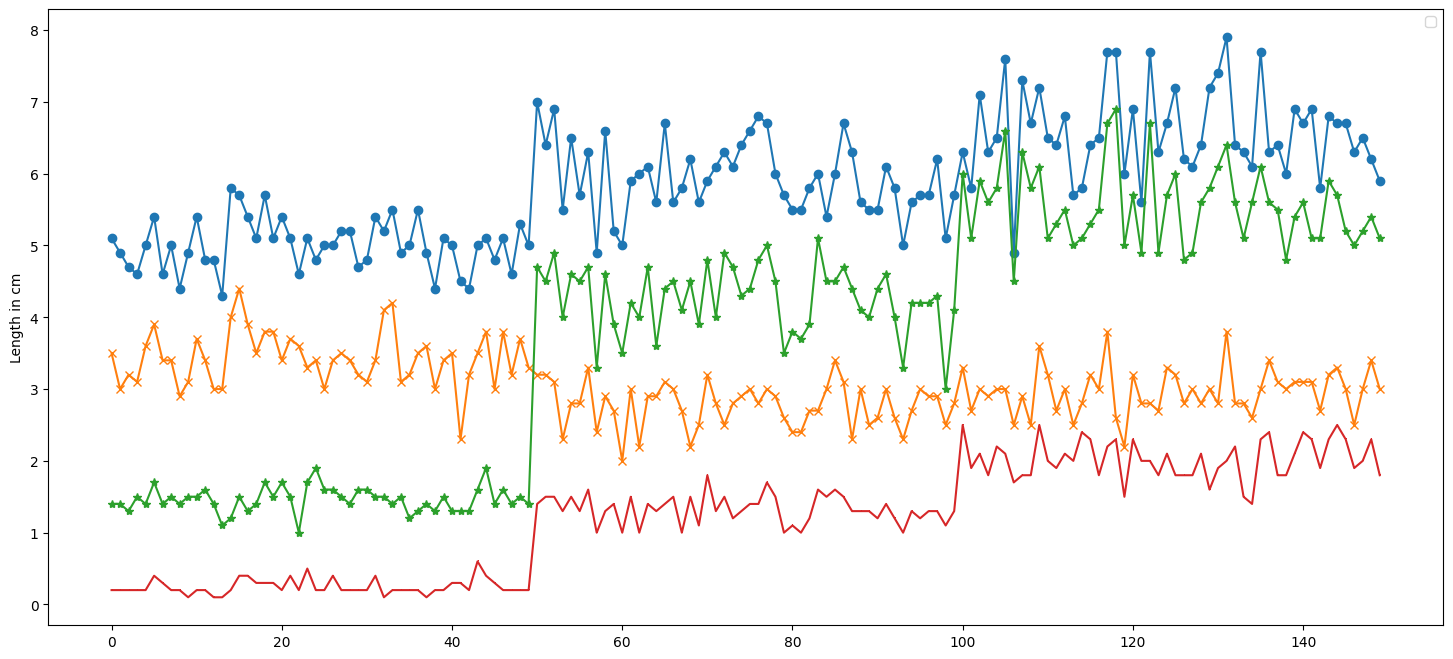

In [ ]:
plt.figure(figsize=[18,8])
plt.plot(data1['sepal length (cm)'], marker= 'o')
plt.plot(data1['sepal width (cm)'], marker= 'x')
plt.plot(data1['petal length (cm)'], marker= '*')
plt.plot(data1['petal width (cm)'], marker= ',')
plt.ylabel('Length in cm')
plt.legend()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data1[['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']], data1['Species'], random_state=0 )

In [ ]:
X_train.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [ ]:
y_train.head()


61     versicolor
92     versicolor
112     virginica
2          setosa
141     virginica
Name: Species, dtype: object

In [ ]:
X_test.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
114,5.8,2.8,5.1,2.4
62,6.0,2.2,4.0,1.0
33,5.5,4.2,1.4,0.2
107,7.3,2.9,6.3,1.8
7,5.0,3.4,1.5,0.2


In [ ]:
y_test.head()


114     virginica
62     versicolor
33         setosa
107     virginica
7          setosa
Name: Species, dtype: object

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)


In [ ]:
knn.fit(X_train, y_train) # This is fitting the model  with the training data.


KNeighborsClassifier(n_neighbors=1)

prediction


In [ ]:
prediction = knn.predict(X_test) # By supplying the test data now predicting the  Y (Species values)


In [ ]:
prediction


array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa', 'virginica', 'versicolor', 'setosa', 'virginica',
       'virginica', 'versicolor', 'setosa', 'virginica'], dtype=object)

In [ ]:
y_test + "  " +  prediction #


114      virginica  virginica
62     versicolor  versicolor
33             setosa  setosa
107      virginica  virginica
7              setosa  setosa
100      virginica  virginica
40             setosa  setosa
86     versicolor  versicolor
76     versicolor  versicolor
71     versicolor  versicolor
134      virginica  virginica
51     versicolor  versicolor
73     versicolor  versicolor
54     versicolor  versicolor
63     versicolor  versicolor
37             setosa  setosa
78     versicolor  versicolor
90     versicolor  versicolor
45             setosa  setosa
16             setosa  setosa
121      virginica  virginica
66     versicolor  versicolor
24             setosa  setosa
8              setosa  setosa
126      virginica  virginica
22             setosa  setosa
44             setosa  setosa
97     versicolor  versicolor
93     versicolor  versicolor
26             setosa  setosa
137      virginica  virginica
84     versicolor  versicolor
27             setosa  setosa
127      v

In [ ]:
X_new = np.array([[5, 2.9, 1, 0.2]])


In [ ]:
predection1 = knn.predict(X_new)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
predection1


array(['setosa'], dtype=object)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score

# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])